In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_cleaning import clean_crime_data, clean_homicide_data, clean_drug_data, read_Crime_Index

x_axis = ["2013", "2014", "2015", "2016", "2017"]

# Crime Index - Brazil

* Data pulled from https://www.numbeo.com/crime/

* Crime Index is determined by this definition:

Crime Index is an estimation of overall level of crime in a given city or a country. We consider crime levels lower than 20 as very low, crime levels between 20 and 40 as being low, crime levels between 40 and 60 as being moderate, crime levels between 60 and 80 as being high and finally crime levels higher than 80 as being very high.




In [66]:
crime_index_2013 = "Resources/2013 Crime Index.csv"
crime_index_2014 = "Resources/2014 Crime Index.csv"
crime_index_2015 = "Resources/2015 Crime Index.csv"
crime_index_2016 = "Resources/2016 Crime Index.csv"
crime_index_2017 = "Resources/2017 Crime Index.csv"

file_list = [crime_index_2013, 
             crime_index_2014, 
             crime_index_2015, 
             crime_index_2016,
             crime_index_2017]

In [67]:
crime_index_df = read_Crime_Index(file_list)
crime_index_df

,Country,Crime Index
Year,,
2013,Brazil,62.62
2014,Brazil,67.00
2015,Brazil,68.95
2016,Brazil,71.23
2017,Brazil,70.62


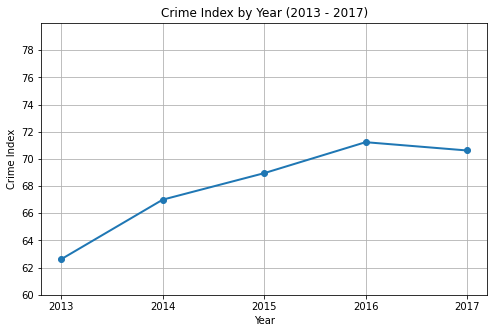

In [83]:
plt.figure(figsize=(8, 5))
plt.plot(x_axis, crime_index_df["Crime Index"], marker="o", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Crime Index")
plt.title("Crime Index by Year (2013 - 2017)")
plt.grid()

plt.ylim(60, 80)
plt.yticks(np.arange(60, 80, step=2))

plt.savefig("Images/Crime Index by Year - Brazil.png")
plt.show()

# Crime Index - Rio

In [69]:
crime_index_rio_2013 = "Resources/2013 Rio Crime Index.csv"
crime_index_rio_2014 = "Resources/2014 Rio Crime Index.csv"
crime_index_rio_2015 = "Resources/2015 Rio Crime Index.csv"
crime_index_rio_2016 = "Resources/2016 Rio Crime Index.csv"
crime_index_rio_2017 = "Resources/2017 Rio Crime Index.csv"

file_list_rio = [crime_index_rio_2013, 
             crime_index_rio_2014, 
             crime_index_rio_2015, 
             crime_index_rio_2016,
             crime_index_rio_2017]

In [70]:
crime_index_rio_df = read_Crime_Index(file_list_rio)
crime_index_rio_df

,Country,Crime Index
Year,,
2013,"Rio de Janeiro, Brazil",67.93
2014,"Rio de Janeiro, Brazil",71.97
2015,"Rio de Janeiro, Brazil",72.64
2016,"Rio de Janeiro, Brazil",77.19
2017,"Rio de Janeiro, Brazil",77.87


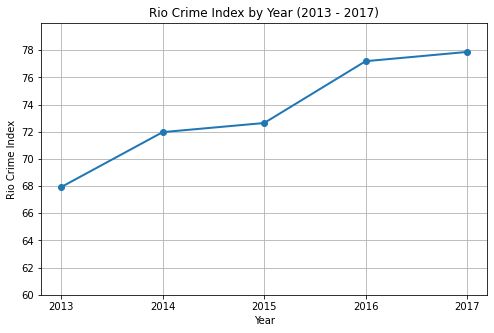

In [82]:
plt.figure(figsize=(8, 5))
plt.plot(x_axis, crime_index_rio_df["Crime Index"], marker="o", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Rio Crime Index")
plt.title("Rio Crime Index by Year (2013 - 2017)")
plt.grid()

plt.ylim(60, 80)
plt.yticks(np.arange(60, 80, step=2))

plt.savefig("Images/Rio Crime Index by Year.png")
plt.show()

# Rio compared to Brazil Crime Index

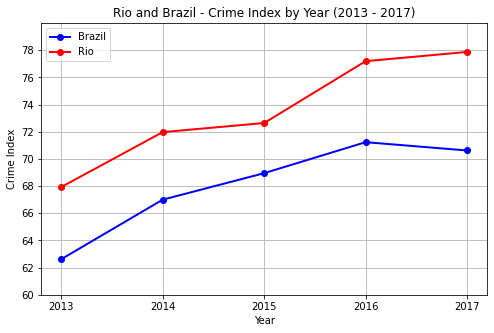

In [81]:
plt.figure(figsize=(8, 5))
brazil_crime, = plt.plot(x_axis, crime_index_df["Crime Index"], marker="o", linewidth=2, color="blue", label="Brazil")
rio_crime, = plt.plot(x_axis, crime_index_rio_df["Crime Index"], marker="o", linewidth=2, color="red", label="Rio")
plt.legend(handles=[brazil_crime, rio_crime], loc="best")

plt.xlabel("Year")
plt.ylabel("Crime Index")
plt.title("Rio and Brazil - Crime Index by Year (2013 - 2017)")

plt.ylim(60, 80)
plt.yticks(np.arange(60, 80, step=2))

plt.grid()

plt.savefig("Images/Rio compared to Brazil - Crime Index.png")
plt.show()

# Data Source:

* https://dataunodc.un.org/

* The source listed on the website:

Source: Data are collected from national authorities through the annual United Nations Crime Trends Survey (UN-CTS).  




# Violent Crime

* Kidnapping
* Assault
* Robbery
* Homicide

In [73]:
homicide_file = "Resources/homicide_total_rate_and_count.csv"
kidnapping_file = "Resources/kidnapping_0.csv"
robbery_file = "Resources/robbery_0.csv"
seizure_file = "Resources/seizure-table.csv"
assault_file = "Resources/serious_assault_0.csv"

In [74]:
# This is where I call the function I just made and pass in the crime and the file

kidnapping_data = clean_crime_data("Kidnapping", kidnapping_file)
robbery_data = clean_crime_data("Robbery", robbery_file)
assault_data = clean_crime_data("Assault", assault_file)
homicide_data = clean_homicide_data("Homicide", homicide_file)

In [75]:
# Merging the data all into 1 dataframe

merged_data = kidnapping_data.merge(robbery_data, how='outer', on = 'Year')
merged_thrice = merged_data.merge(assault_data, how='outer', on = 'Year')
merged_fourth = merged_thrice.merge(homicide_data, how='outer', on = 'Year')

In [76]:
merged_fourth

,Kidnapping Count,Kidnapping Rate,Robbery Count,Robbery Rate,Assault Count,Assault Rate,Homicide Count,Homicide Rate
Year,,,,,,,,
2013,396,0.197,1012504,503.643,661494,329.04,54163.0,26.941954
2014,413,0.204,1282371,632.445,606252,298.99,58497.0,28.849832
2015,473,0.231,1550614,758.350,621009,303.71,58459.0,28.590256
2016,753,0.365,1590325,771.392,600920,291.48,61597.0,29.877807
2017,524,0.252,1657131,797.334,591881,284.79,64078.0,30.831363


# Plotting Violent Crime Counts 

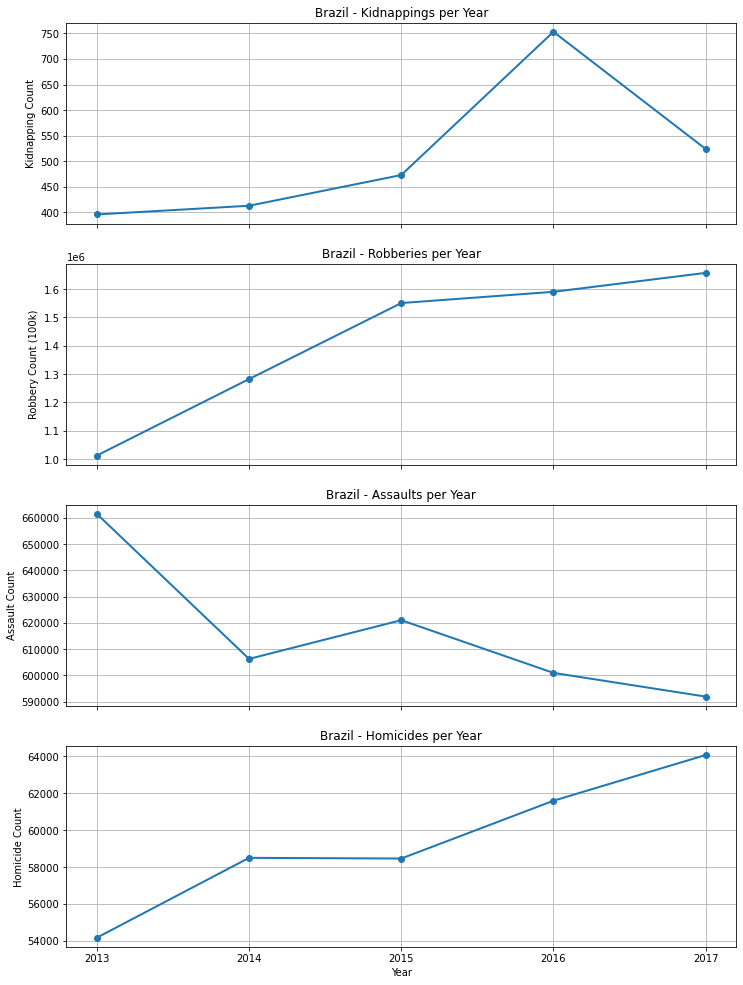

In [77]:
# Creating a figure that has 3 subplots to plot my violent crime data
# The figure will share the same x values being the years

fig, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(12, 17))

axs[0].set_title("Brazil - Kidnappings per Year")
axs[0].plot(x_axis, merged_fourth["Kidnapping Count"], marker="o", linewidth=2)
axs[0].set_ylabel("Kidnapping Count")
axs[0].grid()

axs[1].set_title("Brazil - Robberies per Year")
axs[1].plot(x_axis, merged_fourth["Robbery Count"], marker="o", linewidth=2)
axs[1].set_ylabel("Robbery Count (100k)")
axs[1].grid()

axs[2].set_title("Brazil - Assaults per Year")
axs[2].plot(x_axis, merged_fourth["Assault Count"], marker="o", linewidth=2)
axs[2].set_ylabel("Assault Count")
axs[2].grid()

axs[3].set_title("Brazil - Homicides per Year")
axs[3].plot(x_axis, merged_fourth["Homicide Count"], marker="o", linewidth=2)
axs[3].set_ylabel("Homicide Count")
axs[3].set_xlabel("Year")
axs[3].grid()


plt.savefig("Images/Violent_Crimes_All_Together.png")
plt.show()

# Plotting Violent Crime Rates

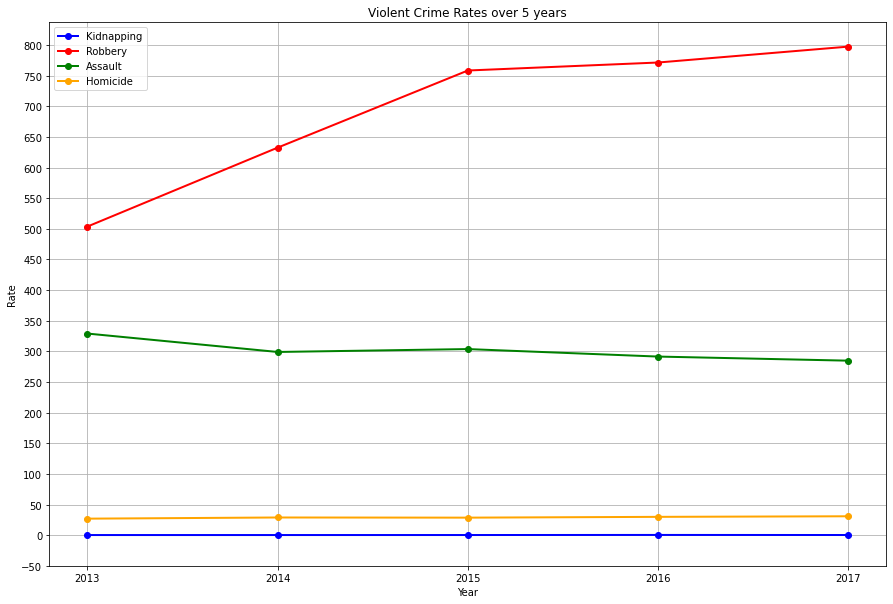

In [78]:
plt.figure(figsize=(15, 10))
kidnapping_rate, = plt.plot(x_axis, merged_fourth["Kidnapping Rate"], marker="o", linewidth=2, color="blue", label="Kidnapping")
robbery_rate, = plt.plot(x_axis, merged_fourth["Robbery Rate"], marker="o", linewidth=2, color="red", label="Robbery")
assault_rate, = plt.plot(x_axis, merged_fourth["Assault Rate"], marker="o", linewidth=2, color="green", label="Assault")
homicide_rate, = plt.plot(x_axis, merged_fourth["Homicide Rate"], marker="o", linewidth=2, color="orange", label="Homicide")
plt.legend(handles=[kidnapping_rate, robbery_rate, assault_rate, homicide_rate], loc="best")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Rate")
plt.title("Violent Crime Rates over 5 years")
plt.yticks(np.arange(-50, 850, step=50))


plt.savefig("Images/Violent_Crimes_Rates.png")
plt.show()

# Analysis